# Worksheet A-3: Graphing with the Grammar of Graphics through ggplot2

By the end of this worksheet, you will be able to:

+ Identify the seven components of the grammar of graphics underlying ggplot2.
+ Produce plots with ggplot2 by implementing the components of the grammar of graphics.
+ Customize the look of ggplot2 graphs.
+ Choose an appropriate plot type for Exploratory Data Analysis, based on an understanding of what makes a graph effective. 

To get full marks for each participation worksheet, you must successfully answer at least 10 of the autograded questions. In this worksheet, there are a total of 21 autograded questions. 


## Getting Started

Load the required packages for this worksheet:

In [30]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(rlang))
suppressPackageStartupMessages(library(tsibble))
suppressPackageStartupMessages(library(gapminder))
suppressPackageStartupMessages(library(palmerpenguins))
suppressPackageStartupMessages(library(ggridges))
suppressPackageStartupMessages(library(scales))
suppressPackageStartupMessages(library(testthat))
suppressPackageStartupMessages(library(digest))

The following code chunk has been unlocked, to give you the flexibility to start this document with some of your own code. Remember, it's bad manners to keep a call to `install.packages()` in your source code, so don't forget to delete these lines if you ever need to run them.

In [28]:
# An unlocked code cell.
install.packages("ggridges")


The downloaded binary packages are in
	/var/folders/4h/98wvt0t96n75wm2l6q8l46nc0000gn/T//RtmpWFTMbN/downloaded_packages


# Part 1: The Grammar of Graphics


## QUESTION 1.0

Consider the following plot. Don't concern yourself with the code at this point.

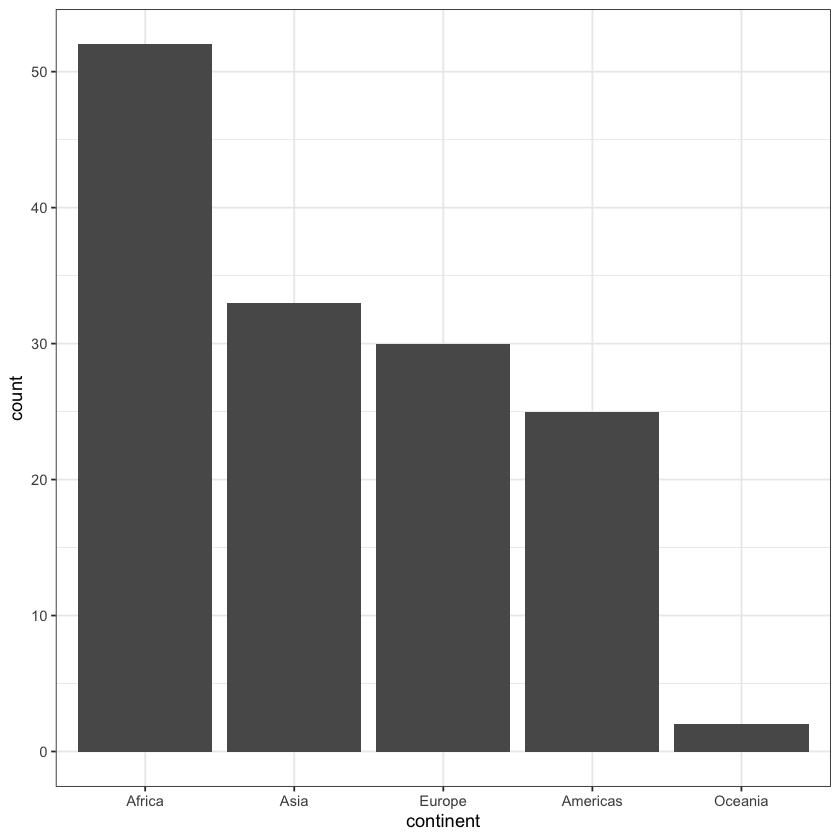

In [32]:
gapminder %>% 
  filter(year == 2007) %>% 
  mutate(continent = fct_infreq(continent)) %>% 
  ggplot(aes(continent)) +
  geom_bar() +
  theme_bw()

Which table specifies the seven grammar of graphics components of this plot? Choose the best option, and place your choice in a variable named `answer1.0`

A)

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `continent` |
| __geometric object__  | `bars` |
| scale                 | `logarithmic` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |

B)

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `continent` |
| __geometric object__  | `bars` |
| scale                 | `linear` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |

C)

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `gapminder` |
| __aesthetic mapping__ | `year` |
| __geometric object__  | `bars` |
| scale                 | `linear` |
| statistical transform | `none` |
| coordinate system     | `rectangular` |
| facetting             | `none` |

In [40]:
answer1.0 <- "B"


In [42]:
test_that("Question 1.0", {
    expect_equal(digest(as.character(toupper(answer1.0))), "3a5505c06543876fe45598b5e5e5195d")
})

Test passed 🎊


## Question 1.1

Consider the following plot. Don't concern yourself with the code at this point.

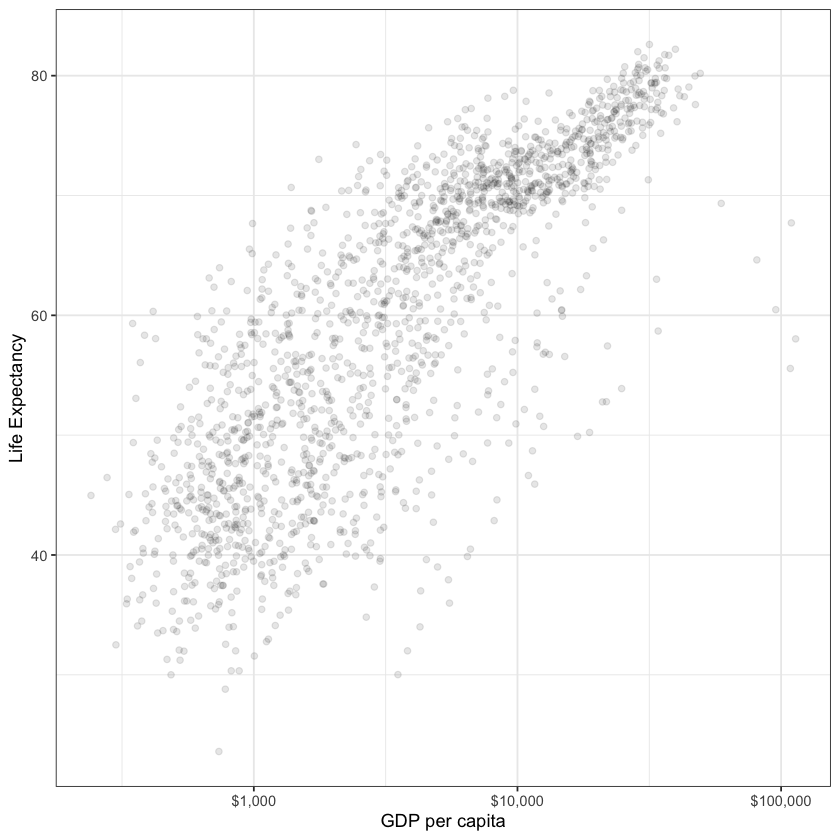

In [44]:
ggplot(gapminder, aes(gdpPercap, lifeExp)) +
  geom_point(alpha = 0.1) +
  scale_x_log10("GDP per capita", labels = scales::dollar_format()) +
  theme_bw() +
  ylab("Life Expectancy")

What is the aesthetic mapping in this plot? Place your answer in a variable named `answer1.1`

A) alpha = 0.1   

B) x: gdpPercap, y: lifeExp   

C) none   

D) "Life Expectancy"

In [66]:
# answer1.1 <- "FILL_THIS_IN"
answer1.1 <- "B"

In [68]:
test_that("Question 1.1", {
    expect_equal(digest(as.character(toupper(answer1.1))), "3a5505c06543876fe45598b5e5e5195d")
})

Test passed 😸


# Part 2: `ggplot2` Syntax 

The following is a tsibble (a special type of tibble containing time series data), stored in the variable `mauna`, of CO$_2$ concentrations collected monthly at the Mauna Loa station.

Execute this code to store the data in `mauna`:

In [70]:
mauna <- tsibble::as_tsibble(co2) %>% 
   rename(month = index, conc = value)
head(mauna)

month,conc
<mth>,<dbl>
1959 Jan,315.42
1959 Feb,316.31
1959 Mar,316.50
1959 Apr,317.56
1959 May,318.13
1959 Jun,318.00


## QUESTION 2.0

Use ggplot2 to produce a line chart showing the concentration of CO$_2$ over time in the `mauna` dataset. Specifically, the plot should have the following grammar components:

| Grammar Component     | Specification |
|-----------------------|---------------|
| __data__              | `mauna` |
| __aesthetic mapping__ | x: month, y: conc |
| __geometric object__  | lines |
| scale                 | linear |
| statistical transform | none |
| coordinate system     | rectangular |
| facetting             | none |

Fill in the blanks to obtain the plot, storing your plot in a variable named `answer2.0`.

```
answer2.0 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN, FILL_THIS_IN)) +
    FILL_THIS_IN()
```

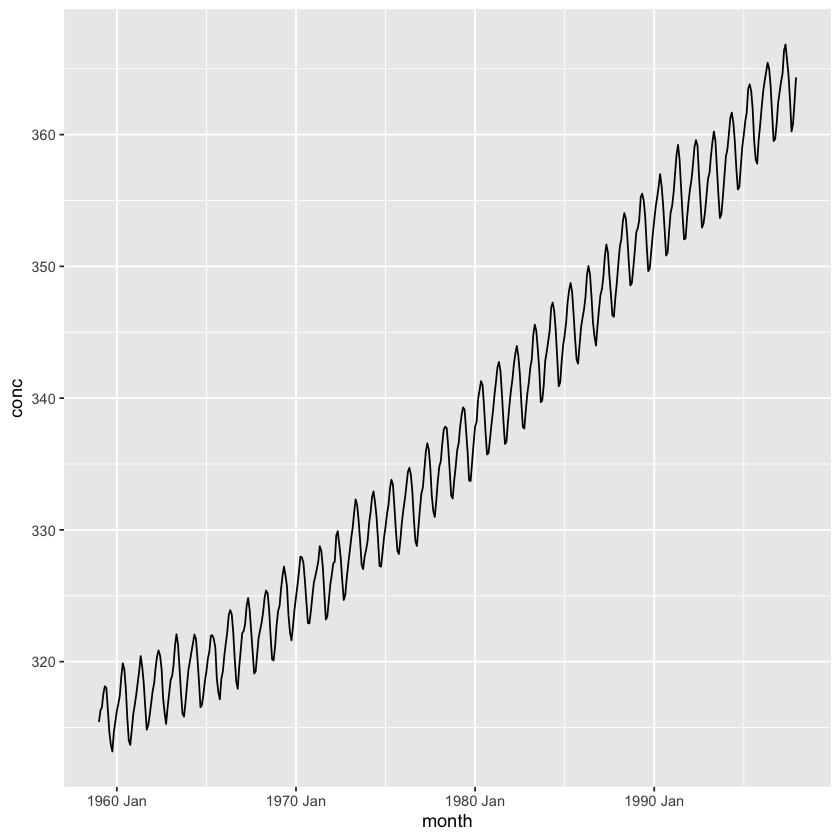

In [80]:
# Produce the plot
# your code here
answer2.0 <- ggplot(mauna, aes(x=month, y=conc)) + geom_line()
print(answer2.0)

In [82]:
test_that("Question 2.0", {
    expect_equal(as.character(rlang::get_expr(answer2.0$mapping$x)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.0$mapping$y)), "conc")
    expect_true("GeomLine" %in% class(answer2.0$layers[[1]]$geom))
})

Test passed 🥳


## QUESTION 2.1

You can store the output of the plot in a variable, too. The plot that you created in 2.0 is stored in the variable `answer2.0`. Add a layer to `answer2.0` that adds green points to the plot. (Not a pretty plot; just expository.)

```
answer2.1 <- answer2.0 +
  FILL_THIS_IN(colour = FILL_THIS_IN)
```

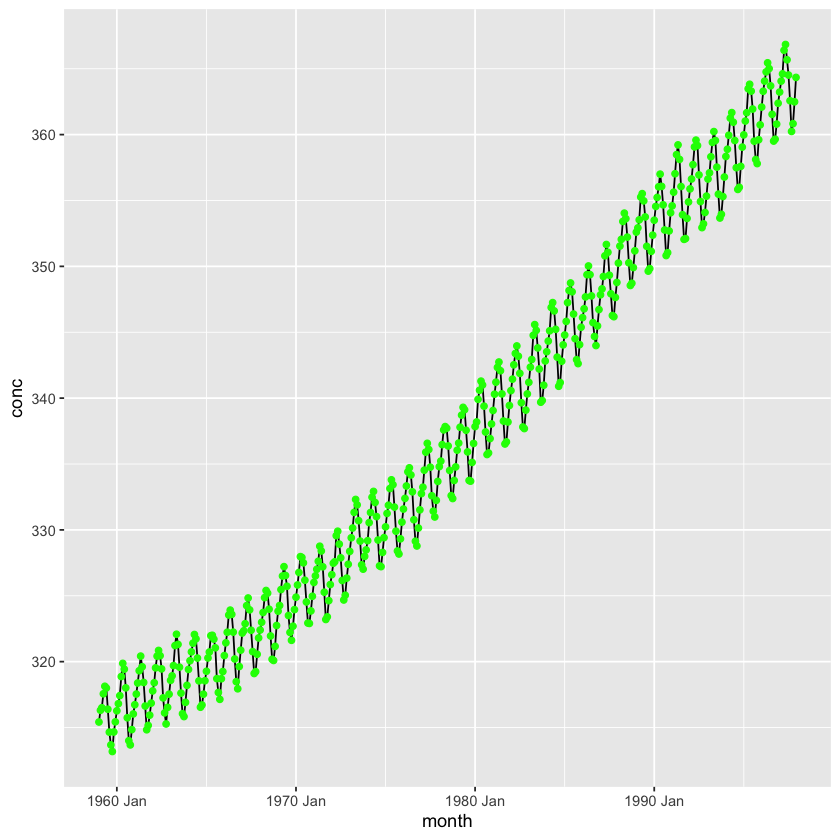

In [88]:
# Produce your plot here. 
# your code here
answer2.1 <- answer2.0 + geom_point(colour = "green")
print(answer2.1)

In [90]:
test_that("Question 2.1", {
    expect_true(all(ggplot_build(answer2.1)$data[[2]]$colour == "green"))
})

Test passed 🎊


## QUESTION 2.2

Besides specifying the aesthetic mappings in the `ggplot()` function, you can also specify the aesthetic mappings in a `geom` layer instead of, or in addition to, in the `ggplot()` function, with the following rules:

- Aesthetics appearing in a `geom` layer apply only to that layer.
- If there are conflicting aesthetics in both the `ggplot()` function and the `geom` layer, the `geom` layer takes precedence.

The following code mistakenly puts the month variable on the y-axis. Fill in the `FILL_THIS_IN` so that `conc` is on the y-axis (and month remains on the x-axis), but leave the rest of the code intact. Note what happens to the y-axis label, though! Store your answer in a variable named `answer2.2`

```
answer2.2 <- ggplot(mauna, aes(x = month, y = month)) +
  geom_point(FILL_THIS_IN)
```

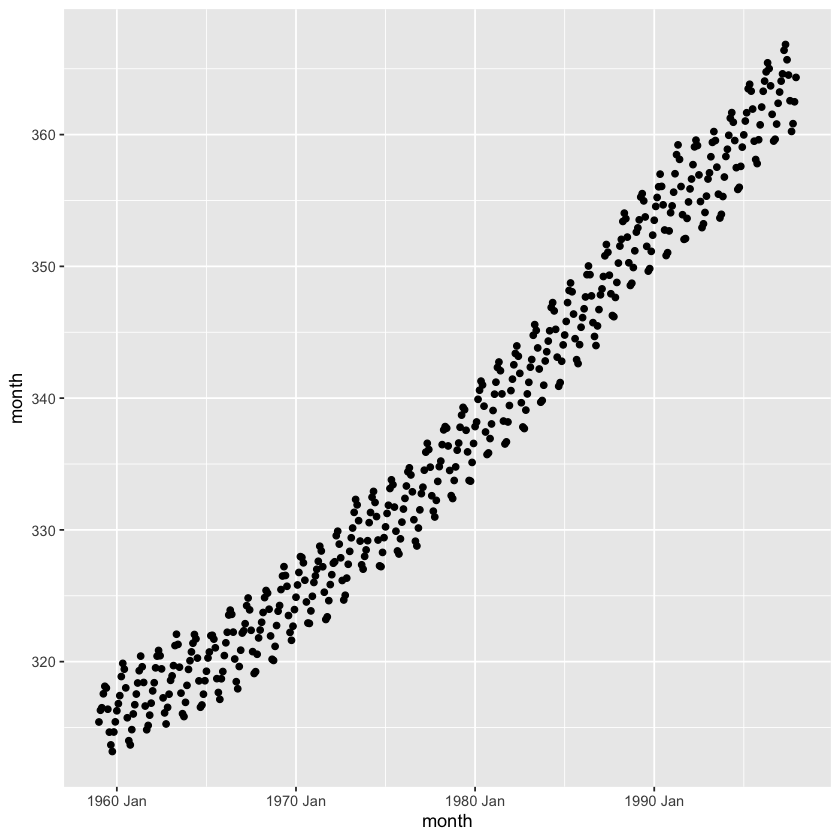

In [104]:
# Produce the plot here.
# your code here
answer2.2 <- ggplot(mauna, aes(x = month, y = month)) + 
geom_point(aes(y=conc))
print(answer2.2)

In [106]:
test_that("Question 2.2", {
    expect_equal(as.character(rlang::get_expr(answer2.2$mapping$x)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.2$mapping$y)), "month")
    expect_equal(as.character(rlang::get_expr(answer2.2$layers[[1]]$mapping$y)), "conc")
})

Test passed 🎉


## QUESTION 2.3

Can you fix what is wrong with the following code?

```
answer2.3 <- ggplot(gapminder) +
    geom_point(x = gdpPercap, y = lifeExp, alpha = 0.1)
```

In [110]:
# Produce your plot here. 
# your code here
answer2.3 <- gapminder %>% 
ggplot(aes(x=gdpPercap, y=lifeExp))+ geom_point(alpha = 0.1)

In [112]:
test_that("Question 2.3", {
    expect_true(
        as.character(rlang::get_expr(answer2.3$mapping$x)) == "gdpPercap" ||
        as.character(rlang::get_expr(answer2.3$layers[[1]]$mapping$x)) == "gdpPercap"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.3$mapping$y)) == "lifeExp" ||
        as.character(rlang::get_expr(answer2.3$layers[[1]]$mapping$y)) == "lifeExp"
    )
})

Test passed 🥳


## QUESTION 2.4

The following mock dataset marks the (x,y) position of a caribou at four time points (be sure to execute the code in the following cell):

In [114]:
caribou <- tribble(
  ~time, ~x, ~y,
  4, 0.4, 0.5,
  1, 0.3, 0.3,
  2, 0.8, 0.7,
  3, 0.5, 0.9
)

Show the path of the caribou by connecting the dots ordered by time. Add an arrow with `arrow = arrow()` in the appropriate `geom` layer, and add the `time` label with `geom_text()`. Store the plot in a variable named `answer2.4`. 

```
answer2.4 <- caribou %>% 
  arrange(time) %>% 
  ggplot(aes(FILL_THIS_IN)) + 
  FILL_THIS_IN(FILL_THIS_IN) +
  geom_text(aes(FILL_THIS_IN), nudge_x = 0.02) +
  theme_minimal()
```

In [120]:
# Produce the plot
# your code here
answer2.4 <- caribou %>% 
arrange(time) %>% 
ggplot(aes(x=x,y=y)) + 
geom_path(arrow=arrow()) + 
geom_text(aes(label = time), nudge_x = 0.02) + 
theme_minimal()
print(answer2.4)

ERROR: Error: object 'answer2.4' not found


In [ ]:
test_that("Question 2.4", {
    expect_true(
        as.character(rlang::get_expr(answer2.4$mapping$x)) == "x" ||
        (as.character(rlang::get_expr(answer2.4$layers[[1]]$mapping$x)) == "x" && 
         as.character(rlang::get_expr(answer2.4$layers[[2]]$mapping$x)) == "x")
    )
    expect_true(
        as.character(rlang::get_expr(answer2.4$mapping$y)) == "y" ||
        (as.character(rlang::get_expr(answer2.4$layers[[1]]$mapping$y)) == "y" && 
         as.character(rlang::get_expr(answer2.4$layers[[2]]$mapping$y)) == "y")
    )
    geoms <- answer2.4$layers %>% 
        map("geom") %>% 
        map(class) %>% 
        map_chr(1)
    expect_true("GeomPath" %in% geoms)
    expect_true("GeomText" %in% geoms)
    expect_false("GeomLine" %in% geoms)
    path_id <- which(geoms == "GeomPath")
    text_id <- which(geoms == "GeomText")
    expect_false(is.null(answer2.4$layers[[path_id]]$geom_params$arrow))
    expect_true(as.character(rlang::get_expr(answer2.4$layers[[text_id]]$mapping$label)) == "time")
})

## QUESTION 2.5

Here's the number of people having a certain hair colour from a sample of 592 people (be sure to run the following code chunk):

In [ ]:
(hair <- as_tibble(HairEyeColor) %>% 
  count(Hair, wt = n))

The following code fails at producing a bar chart that displays the counts on the y-axis. Fix the code.

```
answer2.5 <- ggplot(hair, aes(Hair, n)) +
  geom_bar()
```

Good to know: if you wanted `geom_bar` to specify a _proportion_ instead of a _count_ on the y-axis, you can do this by specifying `after_stat(prop)` as the y variable in your aesthetic mapping.


In [ ]:
# Produce the plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.5)




In [ ]:
test_that("Question 2.5", {
    geoms <- answer2.5$layers %>% 
        map("geom") %>% 
        map(class) %>% 
        map_chr(1)
    if ("GeomBar" %in% geoms) {
        layer <- answer2.5$layers[["GeomBar" == geoms]]
        expect_true(get_expr(answer2.5$mapping$x) == "Hair" ||
                    get_expr(layer$mapping$x) == "Hair")
        expect_true(get_expr(answer2.5$mapping$weight) == "n" ||
                    get_expr(layer$mapping$weight) == "n")
    }
    if ("GeomCol" %in% geoms) {
        layer <- answer2.5$layers[["GeomCol" == geoms]]
        expect_true(get_expr(answer2.5$mapping$x) == "Hair" ||
                    get_expr(layer$mapping$x) == "Hair")
        expect_true(get_expr(answer2.5$mapping$y) == "n" ||
                    get_expr(layer$mapping$y) == "n")
    }
    expect_false("GeomCol" %in% geoms && "GeomBar" %in% geoms)
})

## QUESTION 2.6

Using the `penguins` dataset from the palmerpenguins package, suppose you want to visualize the number of penguins per island. It seems that a bar chart could be useful for this purpose. Give it a try! Hint: bar charts only need specifying one axis (use the x axis). Store your answer in a variable named `answer2.6`

```
answer2.6 <- ggplot(penguins, aes(FILL_THIS_IN)) + FILL_THIS_IN()
```

Good to know: if you wanted to colour the bars by sex, producing a side-by-side bar chart, then in addition to specifying the `fill = sex` aesthetic, just specify the `position = "dodge"` option within the geom that creates the bar.

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.6)

In [ ]:
test_that("Question 2.6", {
    expect_true(
        as.character(rlang::get_expr(answer2.6$mapping$x)) == "island" ||
        as.character(rlang::get_expr(answer2.6$layers[[1]]$mapping$x)) == "island"
    )
    expect_true(
        "GeomBar" %in% class(answer2.6$layers[[1]]$geom) ||
        "GeomCol" %in% class(answer2.6$layers[[1]]$geom)
    )
})

Great job! FYI: sometimes it's useful to swap the axes, especially if the category (penguin) names are long. Here is another handy way to flip the coordinates, instead of plotting the graph again.

In [ ]:
answer2.6 + coord_flip()

## QUESTION 2.7

In the `penguins` dataset from the palmerpenguins package, explore the relationship between flipper length and body mass (if any!). A scaffold of the ggplot2 recipe can be found below. Use the following parameters:

- Flipper length should be on the x axis, and body mass should be on the y axis.
- Color by species.
- Set the size of the points to 3, and the alpha (transparency) to 0.8.

Store the result in a variable named `answer2.7`

```
answer2.7 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN, FILL_THIS_IN)) +
 geom_point(aes(color = FILL_THIS_IN),
            size = FILL_THIS_IN,
            alpha = FILL_THIS_IN) 
```

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.7)

all(ggplot_build(answer2.7)$data[[1]]$alpha == 0.8)

In [ ]:
test_that("Question 2.7", {
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$x)) == "flipper_length_mm" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$x)) == "flipper_length_mm"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$y)) == "body_mass_g"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.7$mapping$colour)) == "species" ||
        as.character(rlang::get_expr(answer2.7$layers[[1]]$mapping$colour)) == "species"
    )
    expect_true(all(ggplot_build(answer2.7)$data[[1]]$alpha == 0.8))
    expect_true(all(ggplot_build(answer2.7)$data[[1]]$size == 3))
})

## QUESTION 2.8

Try the same as in 2.7 (flipper length vs. body mass), but this time coloring by island! See if you can write the code without looking at the last question. Store your answer in a variable named `answer2.8`

```
answer2.8 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN, FILL_THIS_IN)) +
 geom_point(aes(color = FILL_THIS_IN),
            size = FILL_THIS_IN,
            alpha = FILL_THIS_IN) 
```

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
plot(answer2.8)

In [ ]:
test_that("Question 2.8", {
    expect_true(
        as.character(rlang::get_expr(answer2.8$mapping$x)) == "flipper_length_mm" ||
        as.character(rlang::get_expr(answer2.8$layers[[1]]$mapping$x)) == "flipper_length_mm"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.8$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.8$layers[[1]]$mapping$y)) == "body_mass_g"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.8$mapping$colour)) == "island" ||
        as.character(rlang::get_expr(answer2.8$layers[[1]]$mapping$colour)) == "island"
    )
    expect_true(all(ggplot_build(answer2.8)$data[[1]]$alpha == 0.8))
    expect_true(all(ggplot_build(answer2.8)$data[[1]]$size == 3))
})

## QUESTION 2.9

Maybe you want to explore the _distribution_ of body mass. Histograms are useful for this purpose.

Make a histogram of penguin body mass, and store the result in a variable named `answer2.9`. But, instead of the height of the bars representing a _count_, have it represent the _density_ by specifying `after_stat(density)` as the y variable. 

```
answer2.9 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN)) +
   geom_histogram()
```

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.9)

In [ ]:
test_that("Question 2.9", {
    expect_true(
        as.character(rlang::get_expr(answer2.9$mapping$x)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.9$layers[[1]]$mapping$x)) == "body_mass_g"
    )
    expect_true(
        all(as.character(rlang::get_expr(answer2.9$mapping$y)) == c("after_stat", "density")) || 
        all(as.character(rlang::get_expr(answer2.9$layers[[1]]$mapping$y)) == c("after_stat", "density"))
    )
    expect_true("GeomBar" %in% class(answer2.9$layers[[1]]$geom))
})

## QUESTION 2.10

Another option for viewing distributions, besides histograms, is to plot the _kernel density function_. This geom can be achieved with `geom_density()`.

Plot the density of body mass for each species. Distinguish species by colour (if you decide to use the `fill` aesthetic, be sure to add some alpha transparency). Store your answer in a variable named `answer2.10`.

```
answer2.10 <- ggplot(penguins, aes(x = FILL_THIS_IN)) + 
    geom_density(FILL_THIS_IN)
```

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.10)

In [ ]:
test_that("Question 2.10", {
    expect_true(
        as.character(rlang::get_expr(answer2.10$mapping$x)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$x)) == "body_mass_g"
    )
    
    suppressWarnings(
        expect_true(
            as.character(rlang::get_expr(answer2.10$mapping$colour)) == "species" ||
            as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$colour)) == "species" ||
            (
                (
                    as.character(rlang::get_expr(answer2.10$mapping$fill)) == "species" ||
                    as.character(rlang::get_expr(answer2.10$layers[[1]]$mapping$fill)) == "species"
                ) &&
                expect_true(all(!is.na(ggplot_build(answer2.10)$data[[1]]$alpha)))
            )
        )
    )
    
    expect_true("GeomDensity" %in% class(answer2.10$layers[[1]]$geom))
})

## QUESTION 2.11

Let's look at two more types of plot to once again explore the relationship between body mass and penguin species. Stripplots are univariate scatterplots, and they are a useful way of visualizing how, in this case, body mass is spread within each species.

The large amount of overlapping points in the following plot makes it hard to to visualize distributions. Change the plot to a _jitterplot_ by using a different `geom`. Tip: use `width = 0.1` so that the points don't jitter too far away.

```
answer2.11 <- ggplot(penguins, aes(species, body_mass_g)) + 
    geom_point(alpha = 0.5)
```

In [ ]:
# Produce the plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.11)

In [ ]:
test_that("Question 2.11", {
    expect_true(
        as.character(rlang::get_expr(answer2.11$mapping$x)) == "species" ||
        as.character(rlang::get_expr(answer2.11$layers[[1]]$mapping$x)) == "species"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.11$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.11$layers[[1]]$mapping$y)) == "body_mass_g"
    )    
    expect_true("GeomPoint" %in% class(answer2.11$layers[[1]]$geom))
    expect_true("PositionJitter" %in% class(answer2.11$layers[[1]]$position))
})

## QUESTION 2.12

Boxplots are another approach for visualizing distributions. Reproduce the plot in Question 2.11, but as boxplots instead of stripplots. Do so by filling in the following scaffolding. Hint: there's a `geom` for boxplots. Tip: as in the jitterplots, we recommend changing the width of the boxplots, too -- say `width = 0.2`. 

```
answer2.12 <- ggplot(FILL_THIS_IN, aes(FILL_THIS_IN, FILL_THIS_IN)) + 
    FILL_THIS_IN(width = 0.2)
```

In [ ]:
# Produce your plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.12)

In [ ]:
test_that("Question 2.12", {
    expect_true(
        as.character(rlang::get_expr(answer2.12$mapping$x)) == "species" ||
        as.character(rlang::get_expr(answer2.12$layers[[1]]$mapping$x)) == "species"
    )
    expect_true(
        as.character(rlang::get_expr(answer2.12$mapping$y)) == "body_mass_g" ||
        as.character(rlang::get_expr(answer2.12$layers[[1]]$mapping$y)) == "body_mass_g"
    )    
    expect_true("GeomBoxplot" %in% class(answer2.12$layers[[1]]$geom))
})

## QUESTION 2.13

Yet another way to plot distributions is to stack multiple kernel density estimates across different categories on the y-axis. The effect is like viewing a mountain range from an airplane.

Plot the distribution of life expectancy for European countries, using a ridge plot, by filling in the following scaffolding. Hint: use the `geom_density_ridges()` geom from the ggridges package. 

(Sure, the life expectancies associated with a country are observed over time, and are definitely not "iid" in the statistical sense, yet this plot still has value.)

```
answer2.13 <- gapminder %>% 
   filter(continent == "Europe") %>% 
   ggplot(aes(FILL_THIS_IN, FILL_THIS_IN)) +
   ggridges::FILL_THIS_IN()
```

In [ ]:
# Produce the plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.13)

In [ ]:
test_that("Question 2.13", {
    geoms <- answer2.13$layers %>% 
        map("geom") %>% 
        map(class) %>% 
        map_chr(1)
    expect_true("GeomDensityRidges" %in% geoms)
    layer <- answer2.13$layers[["GeomDensityRidges" == geoms]]
    expect_true(get_expr(answer2.13$mapping$x) == "lifeExp" ||
                get_expr(layer$mapping$x) == "lifeExp")
    expect_true(get_expr(answer2.13$mapping$y) == "country" ||
                get_expr(layer$mapping$y) == "country")
})

## QUESTION 2.14

The code below produces a scatterplot of GDP per capita against life expectancy, with points coloured by continent. But, it's hard to distinguish between continents. Modify the plot so that continents are separated into their own panels (hint: use facetting).

Tip: Change the x-axis text to be in "dollar format" with `labels = scales::dollar_format()` when specifying the scale. 

```
answer2.14 <- gapminder %>%
  ggplot(aes(gdpPercap, lifeExp, colour = continent)) +
  geom_point(alpha = 0.2) +
  scale_x_log10()
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
print(answer2.14)

In [ ]:
test_that("Answer 2.14", {
    expect_equal(names(answer2.14$facet$params$facets), "continent")
})

# Part 3: Fix the plots!

In this section, we'll be looking at some erroneous plots and fixing them.

## QUESTION 3.0

Besides alpha transparency, we can fix the issue of overlapping points by making the points smaller. The following code fails to reduce the point size to 0.1 -- can you fix it?


```
answer3.0 <- ggplot(gapminder) +
  geom_point(aes(gdpPercap, lifeExp, size = 0.1)) +
  scale_x_log10(labels = scales::dollar_format())
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
print(answer3.0)

In [ ]:
test_that("Answer 3.0", {
    expect_false("size" %in% names(answer3.0$layers[[1]]$mapping))
    expect_true(all(ggplot_build(answer3.0)$data[[1]]$size == 0.1))
})

## QUESTION 3.1

Fix the plot so that the size of the dots is related to the body mass, and so that the dots are colored by species.

Assign your answer to a variable named `answer3.1`.

```
answer3.1 <- ggplot(penguins, aes(x = body_mass_g, y = flipper_length_mm) +
       geom_point(shape = 21,
                  size = species,
                  fill = island))
```                  

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
print(answer3.1)

In [ ]:
test_that("Answer 3.1", {
    expect_true("x" %in% names(answer3.1$mapping) || "x" %in% names(answer3.1$layers[[1]]$mapping))
    expect_true("y" %in% names(answer3.1$mapping) || "y" %in% names(answer3.1$layers[[1]]$mapping))
    expect_true("size" %in% names(answer3.1$mapping) || "size" %in% names(answer3.1$layers[[1]]$mapping))
    expect_true("fill" %in% names(answer3.1$mapping) || "fill" %in% names(answer3.1$layers[[1]]$mapping))
})

## QUESTION 3.2

Using the `penguins` dataset from the palmerpenguins package, the following code aims to view the relationship between flipper length (X) and body mass (Y) for each species (facet), by sex (colour). Fix the mistake in the code. 

```
answer3.2 <- ggplot(penguins, aes(flipper_length_mm, body_mass_g, facet = species)) +
  geom_point(aes(color = sex),
             size = 3,
             alpha = 0.8) +
  theme_minimal() +
  facet_wrap(~ species)
```

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
print(answer3.2)

In [ ]:
test_that("Answer 3.2", {
    expect_true("sex" %in% as_label(answer3.2$mapping$colour) | 
                "sex" %in% as_label(answer3.2$layers[[1]]$mapping$colour))
    expect_true("flipper_length_mm" %in% as_label(answer3.2$mapping$x) | 
                "flipper_length_mm" %in% as_label(answer3.2$layers[[1]]$mapping$x))
    expect_true("body_mass_g" %in% as_label(answer3.2$mapping$y) | 
                "body_mass_g" %in% as_label(answer3.2$layers[[1]]$mapping$y))
    expect_true(all(ggplot_build(answer3.2)$data[[1]]$size == 3))
    expect_true(all(ggplot_build(answer3.2)$data[[1]]$alpha == 0.8))
    expect_equal(names(answer3.2$facet$params$facets), "species")
})

## QUESTION 3.3

The following plot is a failed attempt at plotting each country's life expectancy over time, so that each country gets its own line. To plot multiple lines in one graph, we need to group by country -- but aren't we doing that in the second line? Fix the code. 

```
answer3.3 <- gapminder %>% 
   group_by(country) %>% 
   ggplot(aes(year, lifeExp)) +
   facet_wrap(~ continent) +
   geom_line(alpha = 0.2) +
   theme_minimal()
```

In [ ]:
# Produce the plot here. 
# your code here
fail() # No Answer - remove if you provide an answer
print(answer3.3)

In [ ]:
test_that("Question 3.3", {
    geoms <- answer3.3$layers %>% 
        map("geom") %>% 
        map(class) %>% 
        map_chr(1)
    expect_true("GeomLine" %in% geoms)
    layer <- answer3.3$layers[["GeomLine" == geoms]]
    expect_true(get_expr(answer3.3$mapping$group) == "country" ||
                get_expr(layer$mapping$group) == "country")
})

# Part 4: Challenges (_Not for points_)

Use your creativity to produce plots for the following situations. This is not for points. Suggested solutions are provided in Part 5. Note that you may need to incorporate data manipulation here.

## QUESTION 4.0

Using the `gapminder` dataset: for each continent, how does the number of countries having a "low" life expectancy change across time? Let's say life expectancy is "low" if it's less than its continent's median life expectancy as observed on the latest year (2007) in the gapminder dataset.

In [ ]:
# Your code here. 

## QUESTION 4.1

From Question 3.3:

> The following plot is a failed attempt at plotting each country's life expectancy over time, so that each country gets its own line. To plot multiple lines in one graph, we need to group by country -- but aren't we doing that in the second line? Fix the code. 

```
answer3.3 <- gapminder %>% 
   group_by(country) %>% 
   ggplot(aes(year, lifeExp)) +
   facet_wrap(~ continent) +
   geom_line(alpha = 0.2) +
   theme_minimal()
```

In addition: 

1. Produce a band representing the 80% prediction interval of life expectancies for each continent and each year. _Hint_: use Base R's `quantile()` function with `probs = 0.9` and `probs = 0.1` to produce the upper and lower bands, and use `geom_ribbon()` as your geometric object. 
2. Drop Oceania, as it only has two countries on record (so a prediction interval wouldn't make much sense).

In [ ]:
# Your code here. 

## QUESTION 4.2

From the gapminder dataset, was a drop in life expectancy just as likely for any year, or were some years more prone to see a drop than others? 

In [ ]:
# Your code here

## QUESTION 4.3

Using the gapminder dataset, how has the distribution of GDP per capita (across countries) changed over time for each continent?

In [ ]:
# Your code here

# Part 5: Suggested Solutions to Part 4

## Suggested Answer to QUESTION 4.0

> Using the `gapminder` dataset: for each continent, how does the number of countries having a "low" life expectancy change across time? Let's say life expectancy is "low" if it's less than its continent's median life expectancy as observed on the latest year (2007) in the gapminder dataset.

In [ ]:
gapminder %>% 
  group_by(continent, year) %>%
  mutate(median = median(lifeExp)) %>% 
  ungroup(year) %>% 
  arrange(year) %>% 
  filter(lifeExp < last(median)) %>% 
  count(continent, year) %>% 
  ggplot(aes(year, n)) +
  geom_line(aes(colour = continent)) +
  ylab("# of countries with low lifeExp") +
  scale_x_continuous("") +
  scale_colour_discrete("") +
  theme_minimal()

## Suggested Answer to QUESTION 4.1

> From Question 3.3:
> 
> > The following plot is a failed attempt at plotting each country's life expectancy over time, so that each country gets its own line. To plot multiple lines in one graph, we need to group by country -- but aren't we doing that in the second line? Fix the code. 
> 
> ```
answer3.3 <- gapminder %>% 
   group_by(country) %>% 
   ggplot(aes(year, lifeExp)) +
   facet_wrap(~ continent) +
   geom_line(alpha = 0.2) +
   theme_minimal()
> ```
> 
> In addition: 
> 
> 1. Produce a band representing the 80% prediction interval of life expectancies for each continent and each year. _Hint_: use Base R's `quantile()` function with `probs = 0.9` and `probs = 0.1` to produce the upper and lower bands, and use `geom_ribbon()` as your geometric object. 
> 2. Drop Oceania, as it only has two countries on record (so a prediction interval wouldn't make much sense).

In [ ]:
gapminder %>% 
  filter(continent != "Oceania") %>% 
  group_by(continent, year) %>% 
  mutate(upper = quantile(gdpPercap, 0.9), 
         lower = quantile(gdpPercap, 0.1)) %>% 
  ggplot(aes(year, gdpPercap)) +
  geom_ribbon(aes(ymin = lower, ymax = upper), alpha = 2 / 3, fill = "gray") +
  geom_line(aes(group = country, colour = continent), alpha = 1 / 4) +
  facet_wrap(~ continent) +
  scale_y_log10("GDP Per Capita", labels = scales::dollar_format()) +
  guides(colour = FALSE) +
  theme_bw()

## Suggested Answer to QUESTION 4.2

> From the gapminder dataset, was a drop in life expectancy just as likely for any year, or were some years more prone to see a drop than others? 

In [ ]:
gapminder %>% 
  group_by(country) %>% 
  arrange(year) %>% 
  mutate(inc = lifeExp - lag(lifeExp)) %>% 
  filter(inc < 0) %>% 
  ggplot(aes(year)) +
  geom_bar() +
  theme_minimal() +
  ylab("Number of countries with a\ndrop in life expectancy")

## Suggested Answer to QUESTION 4.3

> Using the gapminder dataset, how has the distribution of GDP per capita (across countries) changed over time for each continent?

A plot like the one below might need some buildup before presenting it to an audience. Or, consider facetting. 

In [ ]:
gapminder %>% 
  filter(continent != "Oceania") %>% 
  ggplot(aes(gdpPercap, factor(year))) +
  ggridges::geom_density_ridges(aes(fill = continent), alpha = 1/3) +
  scale_x_log10("GDP per capita", labels = scales::dollar_format()) +
  ylab("Year") +
  theme_minimal() +
  scale_fill_discrete("")

## Attribution

Thanks to Icíar Fernández Boyano, Victor Yuan, and Vincenzo Coia for putting this worksheet together.

The following resources were used as inspiration in the creation of this worksheet:

+ [R4DS Data Manipulation Chapter](https://r4ds.had.co.nz/transform.html)
+ [Rebecca Barter's post on across()](http://www.rebeccabarter.com/blog/2020-07-09-across/)
+ STAT545 materials from previous years 
+ [Palmer penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/examples.html)